In [3]:
from mltranslator.modules.inpainting.inpaintor import Inpaintor
from mltranslator import PROJECT_DIR
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [4]:
my_inpaintor = Inpaintor()

The `test2_mask_gt.jpg` is manually drawn for testing purpose.

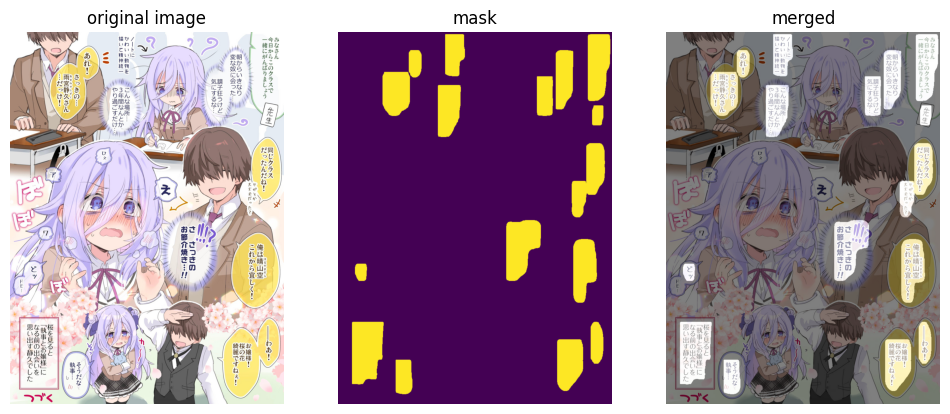

In [5]:
image = Image.open(f'{PROJECT_DIR}/dataset/test/test2.jpg')
mask = Image.open(f'{PROJECT_DIR}/dataset/test/test2_mask_gt.jpg')

# plot image

fig, _ = plt.subplots(1,3, figsize=(12,8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
fig.axes[0].set_title("original image")
fig.axes[1].imshow(mask)
fig.axes[1].axis("off")
fig.axes[1].set_title("mask")
fig.axes[2].imshow(Image.blend(image, mask.convert("RGB"), 0.5))
fig.axes[2].axis("off")
fig.axes[2].set_title("merged")
plt.show()

In [6]:
inpaint_mask, inpaint_result = my_inpaintor.inpaint_custom(image, np.array(mask))

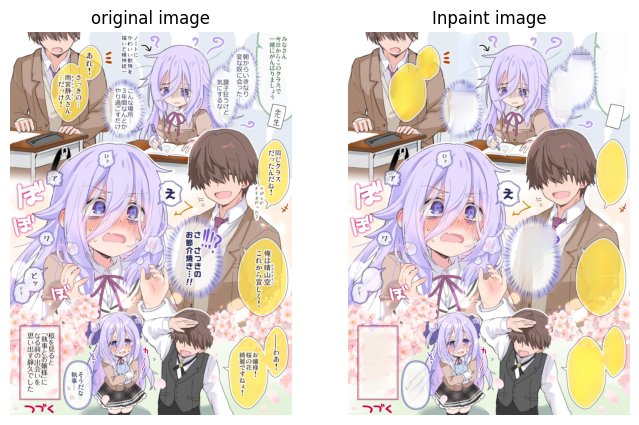

In [7]:
inpaint_result_pil = Image.fromarray(inpaint_result)
fig, _ = plt.subplots(1, 2, figsize=(8, 8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
fig.axes[0].set_title("original image")
fig.axes[1].imshow(inpaint_result_pil)
fig.axes[1].axis("off")
fig.axes[1].set_title("Inpaint image")
plt.show()

[W317 17:43:56.756585373 NNPACK.cpp:62] Could not initialize NNPACK! Reason: Unsupported hardware.


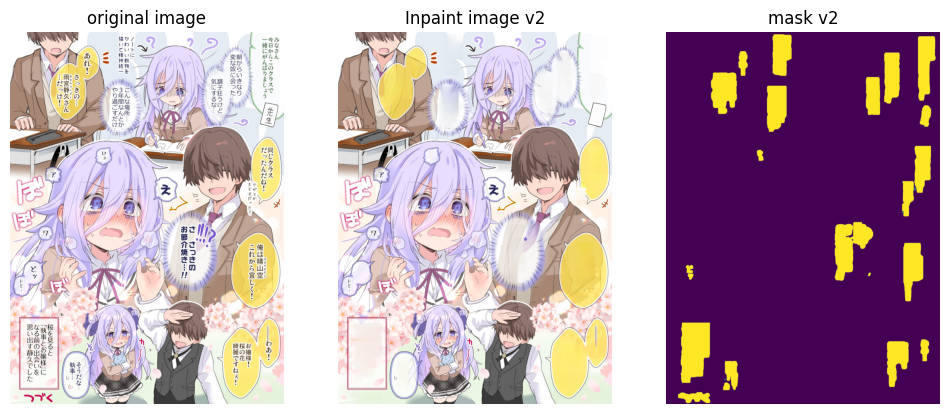

In [8]:
mask_v2, inpaint_result_v2 = my_inpaintor.inpaint_v2(image)

mask_v2_pil = Image.fromarray(mask_v2)
inpaint_result_v2_pil = Image.fromarray(inpaint_result_v2)

fig, _ = plt.subplots(1,3, figsize=(12,8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
fig.axes[0].set_title("original image")
fig.axes[1].imshow(inpaint_result_v2_pil)
fig.axes[1].axis("off")
fig.axes[1].set_title("Inpaint image v2")
fig.axes[2].imshow(mask_v2_pil)
fig.axes[2].axis("off")
fig.axes[2].set_title("mask v2")
plt.show()

In [9]:
inpaint_result_v2_pil.size, mask_v2_pil.size

((2297, 3123), (2297, 3123))

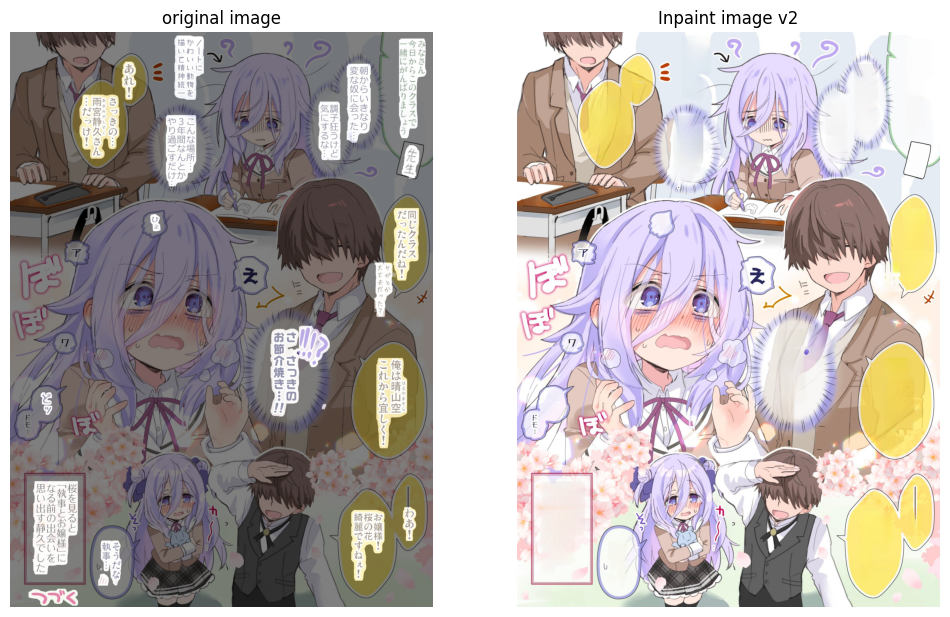

In [10]:
merged_image = Image.blend(image, mask_v2_pil.convert("RGB"), alpha=0.50)

fig, _ = plt.subplots(1,2, figsize=(12,8))
fig.axes[0].imshow(merged_image)
fig.axes[0].axis("off")
fig.axes[0].set_title("original image")
fig.axes[1].imshow(inpaint_result_v2_pil)
fig.axes[1].axis("off")
fig.axes[1].set_title("Inpaint image v2")
# fig.axes[2].imshow(Image.fromarray(mask_v2))
# fig.axes[2].axis("off")
# fig.axes[2].set_title("mask v2")
plt.show()


In [ ]:
from PIL import ImageDraw, ImageChops
from typing import List, Tuple

In [ ]:
def create_mask_from_polygon(
    size: Tuple[int, int],
    coords: List[Tuple[int, int]],
) -> Image.Image:
    mask = Image.new(mode="L", size=size, color=0)
    draw = ImageDraw.Draw(mask)
    draw.polygon(xy=coords, fill=255, outline=255, width=1)
    return mask
    # return np.zeros((w, h), dtype=np.int8)

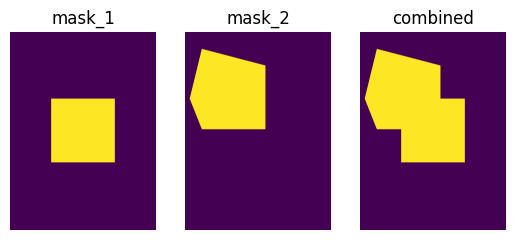

In [88]:
w, h, *_ = image.size
# w, h = 20, 40
offset = 500

coords_1 = (
    (w // 2 - offset, h // 2 - offset),
    (w // 2 - offset, h // 2 + offset),
    (w // 2 + offset, h // 2 + offset),
    (w // 2 + offset, h // 2 - offset),
)

coords_2 = (
    (w // 3 - offset, h // 4 - offset),
    (w // 4 - offset, h // 2 - offset),
    (w // 3 - offset, h // 3 + offset),
    (w // 3 + offset, h // 3 + offset),
    (w // 3 + offset, h // 3 - offset),
)

my_mask_1 = create_mask_from_polygon(size=(w, h), coords=coords_1)
my_mask_2 = create_mask_from_polygon(size=(w, h), coords=coords_2)
combined_mask = ImageChops.add(my_mask_1, my_mask_2)

fig, _ = plt.subplots(1, 3)
fig.axes[0].imshow(my_mask_1)
fig.axes[0].axis("off")
fig.axes[0].set_title("mask_1")
fig.axes[1].imshow(my_mask_2)
fig.axes[1].axis("off")
fig.axes[1].set_title("mask_2")
fig.axes[2].imshow(combined_mask)
fig.axes[2].axis("off")
fig.axes[2].set_title("combined")
plt.show()

In [89]:
inpaint_mask, inpaint_result = my_inpaintor.inpaint_custom(image, np.array(combined_mask))

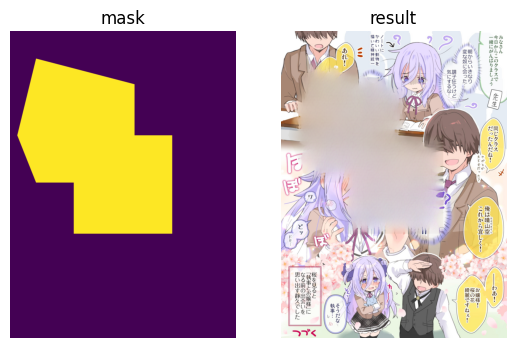

In [91]:
fig, _ = plt.subplots(1, 2)
fig.axes[0].imshow(inpaint_mask)
fig.axes[0].axis("off")
fig.axes[0].set_title("mask")
fig.axes[1].imshow(inpaint_result)
fig.axes[1].axis("off")
fig.axes[1].set_title("result")
plt.show()